## Model Training 

### 1.1 Import Important pacakges

In [4]:
## Basic Pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
## Modelling Pacakges
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV dataframe

In [5]:
data = pd.read_csv('stud.csv')

In [6]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
X = data.drop(columns = ['math_score'], axis = 1)

In [8]:
y = data['math_score']

In [9]:
print('caterogries in gender variable :', data['gender'].unique())
print('caterogries in race_ethnicity variable :', data['race_ethnicity'].unique())
print('caterogries in parental_level_of_education variable :', data['parental_level_of_education'].unique())
print('caterogries in lunch variable :', data['lunch'].unique())
print('caterogries in test_preparation_course variable :', data['test_preparation_course'].unique())

caterogries in gender variable : ['female' 'male']
caterogries in race_ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
caterogries in parental_level_of_education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
caterogries in lunch variable : ['standard' 'free/reduced']
caterogries in test_preparation_course variable : ['none' 'completed']


In [10]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([('OneHotEncoder', cat_transformer, cat_features),('StandardScaler',numeric_transformer,num_features )
                                 ])

### I will tell you what is going here
-num_features exclude categorical feature
-cat_feature include categorial feature 

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [14]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
y_hat = LR.predict(X_test)

In [15]:
y_train_predict = LR.predict(X_train)

In [16]:
train_score = r2_score(y_train,y_train_predict )

In [17]:
train_score

0.8735068463594741

In [18]:
test_score = r2_score(y_hat, y_test)
test_score

0.8659424994992475

Text(0, 0.5, 'Predicted')

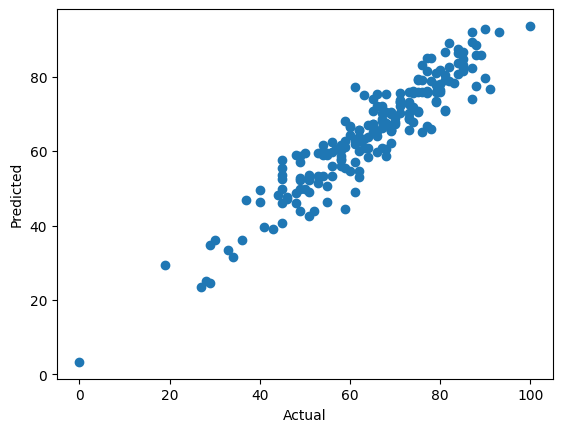

In [19]:
plt.scatter(y_test, y_hat)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot: xlabel='math_score'>

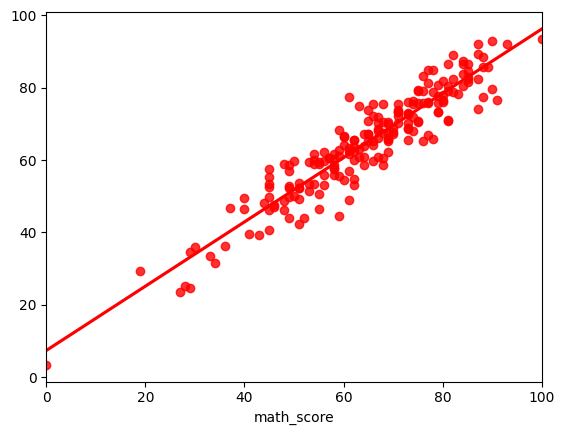

In [20]:
sb.regplot(x = y_test , y = y_hat, ci = None, color = 'red')

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_hat,'Difference':y_test-y_hat})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500


### Root Mean Squared Error (RMSE):
RMSE measures the average distance between the predicted and actual values, taking into account both the magnitude and direction of the errors. It is calculated as the square root of the mean of the squared differences between y_pred and y_true.

### Mean Absolute Error (MAE):
MAE measures the average absolute difference between the predicted and actual values. It ignores the direction of the errors and only considers their magnitude. It is calculated as the mean of the absolute differences between y_pred and y_true.
MAE = mean(abs(y_pred - y_true))

### R2 Score, 
also known as the coefficient of determination, indicates the proportion of the variance in the dependent variable that can be explained by the independent variables. It measures the goodness of fit of a regression model. R2 Score ranges from 0 to 1, with 1 indicating a perfect fit.

R2 Score = 1 - (sum((y_true - y_pred)^2) / sum((y_true - mean(y_true))^2))

In [51]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_hat)

# R2 Score
r2 = r2_score(y_test, y_hat)

print(rmse)
print(mae)
print(r2)

5.421371554436202
4.2253125
0.8792164757750934
